<a href="https://colab.research.google.com/github/jacksonmcl/Federal_Funds_Rate_Model/blob/main/4.%20Multivariate-Model%20Training/multivariate_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Github Setup

In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
!git -C "Federal_Funds_Rate_Model" pull || git clone https://github.com/jacksonmcl/Federal_Funds_Rate_Model.git "Federal_Funds_Rate_Model"

Already up to date.


#Imports & Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


from datetime import datetime
from functools import reduce
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

dfs = {}
feature_list = ['Lagged_FFER', 'Discount_Rate', 'Prime_Rate', 'Consumer_Price_Index', 'Producer_Price_Index', 'Personal_Consumption_Expenditure', 'Mortgage_Rate', 'Auto_Loan_Rate']

In [ ]:
dfs['Federal_Funds_Rate'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Federal_Funds_Rate.csv')
dfs['Lagged_FFER'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Lagged_FFR.csv')

dfs['Discount_Rate'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Discount_Rate.csv')
dfs['Prime_Rate'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Prime_Loan_Rate.csv')

dfs['Consumer_Price_Index'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Consumer_Price_Index.csv')
dfs['Producer_Price_Index'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Producer_Price_Index.csv')
dfs['Personal_Consumption_Expenditure'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Personal_Consumption_Expenditures.csv')

dfs['Unemployment_Rate'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Unemployment_Rate.csv')
dfs['Mortgage_Rate'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Mortgage_Rate.csv')
dfs['Auto_Loan_Rate'] = pd.read_csv('Federal_Funds_Rate_Model/2. Data Visualization/clean_Auto_Loan_Rate.csv')

ffr_df = dfs.pop('Federal_Funds_Rate')

# Mutli-Variate LSTM Model

In [ ]:
dfs['Lagged_FFER'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)

dfs['Discount_Rate'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)
dfs['Prime_Rate'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)

dfs['Consumer_Price_Index'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)
dfs['Producer_Price_Index'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)
dfs['Personal_Consumption_Expenditure'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)

dfs['Unemployment_Rate'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)
dfs['Mortgage_Rate'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)
dfs['Auto_Loan_Rate'].drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)

ffr_df.drop(columns = ['ChangePercentYear', 'Value'], axis=1, inplace=True)

In [ ]:
dfs['Lagged_FFER'].columns = ['Date', 'Lagged_FFER']
dfs['Lagged_FFER'].dropna(inplace=True)

dfs['Discount_Rate'].columns = ['Date', 'Discount_Rate']
dfs['Prime_Rate'].columns = ['Date', 'Prime_Rate']
dfs['Discount_Rate'].dropna(inplace=True)
dfs['Prime_Rate'].dropna(inplace=True)

dfs['Consumer_Price_Index'].columns = ['Date', 'Consumer_Price_Index']
dfs['Producer_Price_Index'].columns = ['Date', 'Producer_Price_Index']
dfs['Personal_Consumption_Expenditure'].columns = ['Date', 'Personal_Consumption_Expenditure']
dfs['Consumer_Price_Index'].dropna(inplace=True)
dfs['Producer_Price_Index'].dropna(inplace=True)
dfs['Personal_Consumption_Expenditure'].dropna(inplace=True)

dfs['Mortgage_Rate'].columns = ['Date', 'Mortgage_Rate']
dfs['Auto_Loan_Rate'].columns = ['Date', 'Auto_Loan_Rate']
dfs['Mortgage_Rate'].dropna(inplace=True)
dfs['Auto_Loan_Rate'].dropna(inplace=True)

ffr_df.columns = ['Date', 'Federal_Funds_Rate']
ffr_df.dropna(inplace=True)

dataframe_list = [ffr_df] + [dfs[feature] for feature in feature_list]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='inner'), dataframe_list)
df_merged.set_index('Date', inplace = True)

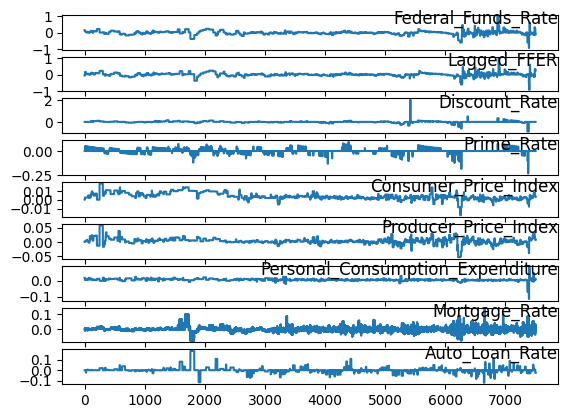

In [ ]:
values = df_merged.values

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)

groups = [0, 1, 2, 3, 4, 5, 6, 7, 8]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df_merged.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
df_merged

,Federal_Funds_Rate,Lagged_FFER,Discount_Rate,Prime_Rate,Consumer_Price_Index,Producer_Price_Index,Personal_Consumption_Expenditure,Mortgage_Rate,Auto_Loan_Rate
Date,,,,,,,,,
1972-03,0.160606,-0.059829,0.0,0.0,0.000000,0.000000,0.017658,0.001368,0.000000
1972-03,0.160606,-0.059829,0.0,0.0,0.000000,0.000000,0.017658,0.000000,0.000000
1972-03,0.160606,-0.059829,0.0,0.0,0.000000,0.000000,0.017658,-0.001366,0.000000
1972-03,0.160606,-0.059829,0.0,0.0,0.000000,0.000000,0.017658,0.000000,0.000000
1972-03,0.160606,-0.059829,0.0,0.0,0.000000,0.000000,0.017658,-0.010944,0.000000
...,...,...,...,...,...,...,...,...,...
2021-07,0.250000,0.333333,0.0,0.0,0.004914,0.012888,0.002465,0.007194,0.000000
2021-08,-0.100000,0.250000,0.0,0.0,0.002923,0.006750,0.010300,-0.010714,-0.026515
2021-08,-0.100000,0.250000,0.0,0.0,0.002923,0.006750,0.010300,0.036101,-0.026515


In [ ]:
df_merged.index = pd.to_datetime(df_merged.index)
df_merged = df_merged.groupby(df_merged.index.date).mean()
df_merged

,Federal_Funds_Rate,Lagged_FFER,Discount_Rate,Prime_Rate,Consumer_Price_Index,Producer_Price_Index,Personal_Consumption_Expenditure,Mortgage_Rate,Auto_Loan_Rate
1972-03-01,0.160606,-0.059829,0.0,0.000000,0.000000,0.000000,0.017658,-0.002188,0.000000
1972-04-01,0.088773,0.160606,0.0,0.013158,0.002415,0.002551,0.004405,0.003442,0.000000
1972-05-01,0.023981,0.088773,0.0,0.000000,0.002410,0.005089,0.007309,0.002383,-0.023529
1972-06-01,0.044496,0.023981,0.0,0.016667,0.002404,0.005063,0.004749,-0.000536,0.000000
1972-07-01,0.020179,0.044496,0.0,0.000000,0.002398,0.007557,0.010898,0.000903,0.000000
...,...,...,...,...,...,...,...,...,...
2021-04-01,0.000000,-0.125000,0.0,0.000000,0.006953,0.013488,0.012894,-0.012196,0.000000
2021-05-01,-0.142857,0.000000,0.0,0.000000,0.006373,0.032125,0.002231,-0.002432,0.013436
2021-06-01,0.333333,-0.142857,0.0,0.000000,0.008240,0.017786,0.014614,0.006027,0.000000
2021-07-01,0.250000,0.333333,0.0,0.000000,0.004914,0.012888,0.002465,-0.014903,0.000000


In [ ]:
# Save last 10 years for testing
test_len = 120
df_train = df_merged.iloc[:(594-test_len)]
df_test = df_merged.iloc[(594-test_len):]

In [ ]:
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))

x_train = x_scaler.fit_transform(df_train[feature_list])
y_train = y_scaler.fit_transform(df_train[['Federal_Funds_Rate']])

x_test = x_scaler.transform(df_test[feature_list])
y_test = y_scaler.transform(df_test[['Federal_Funds_Rate']])

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(474, 1, 8) (474, 1) (120, 1, 8) (120, 1)


In [ ]:
# design network with 300 neurons
model = Sequential()
model.add(LSTM(300, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


474/474 - 4s - 9ms/step - loss: 0.0217 - val_loss: 0.0792
Epoch 2/50
474/474 - 6s - 13ms/step - loss: 0.0179 - val_loss: 0.0780
Epoch 3/50
474/474 - 4s - 8ms/step - loss: 0.0173 - val_loss: 0.0780
Epoch 4/50
474/474 - 3s - 5ms/step - loss: 0.0168 - val_loss: 0.0785
Epoch 5/50
474/474 - 3s - 5ms/step - loss: 0.0165 - val_loss: 0.0791
Epoch 6/50
474/474 - 5s - 11ms/step - loss: 0.0162 - val_loss: 0.0797
Epoch 7/50
474/474 - 3s - 6ms/step - loss: 0.0160 - val_loss: 0.0804
Epoch 8/50
474/474 - 6s - 12ms/step - loss: 0.0158 - val_loss: 0.0812
Epoch 9/50
474/474 - 4s - 9ms/step - loss: 0.0156 - val_loss: 0.0824
Epoch 10/50
474/474 - 3s - 7ms/step - loss: 0.0154 - val_loss: 0.0837
Epoch 11/50
474/474 - 5s - 11ms/step - loss: 0.0152 - val_loss: 0.0852
Epoch 12/50
474/474 - 6s - 13ms/step - loss: 0.0150 - val_loss: 0.0868
Epoch 13/50
474/474 - 4s - 8ms/step - loss: 0.0149 - val_loss: 0.0885
Epoch 14/50
474/474 - 2s - 5ms/step - loss: 0.0148 - val_loss: 0.0901
Epoch 15/50
474/474 - 3s - 5ms/step

In [ ]:
# make a prediction
yhat = model.predict(x_test)
# invert scaling for our forcast
inv_yhat = y_scaler.inverse_transform(yhat)
# Add our forecast to the test dataframe and plot the results
df_test['Predicted Federal_Funds_Rate'] = inv_yhat
df_test[['Federal_Funds_Rate','Predicted Federal_Funds_Rate']].plot(figsize=(14,5))
# Calculate RMSE
multi_rmse=sqrt(mean_squared_error(df_test['Federal_Funds_Rate'],df_test['Predicted Federal_Funds_Rate']))
print('Test RMSE:' , multi_rmse)